In [62]:
# Import All libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing  import StandardScaler
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn import metrics 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [63]:
df = pd.read_csv("Rainfall.csv")

In [64]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [65]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
8424,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [66]:
df.shape

(8425, 23)

In [67]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [68]:
# Handle Missing Values

df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

<AxesSubplot:>

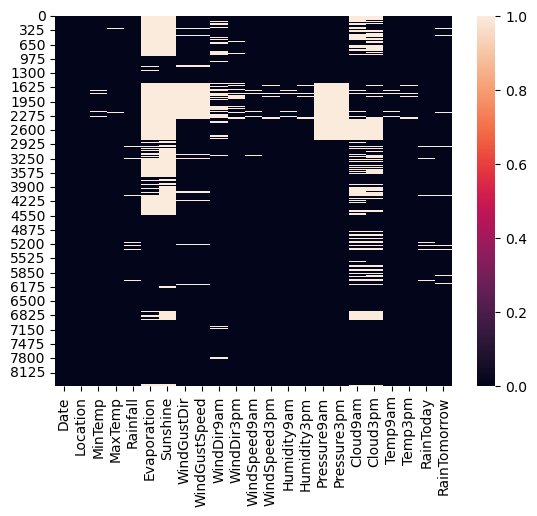

In [69]:
# Handle Missing Values

sns.heatmap(df.isnull())

In [70]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [71]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [72]:

numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 16
Discrete feature Count 2
Continuous feature Count 14
Categorical feature Count 7


<AxesSubplot:>

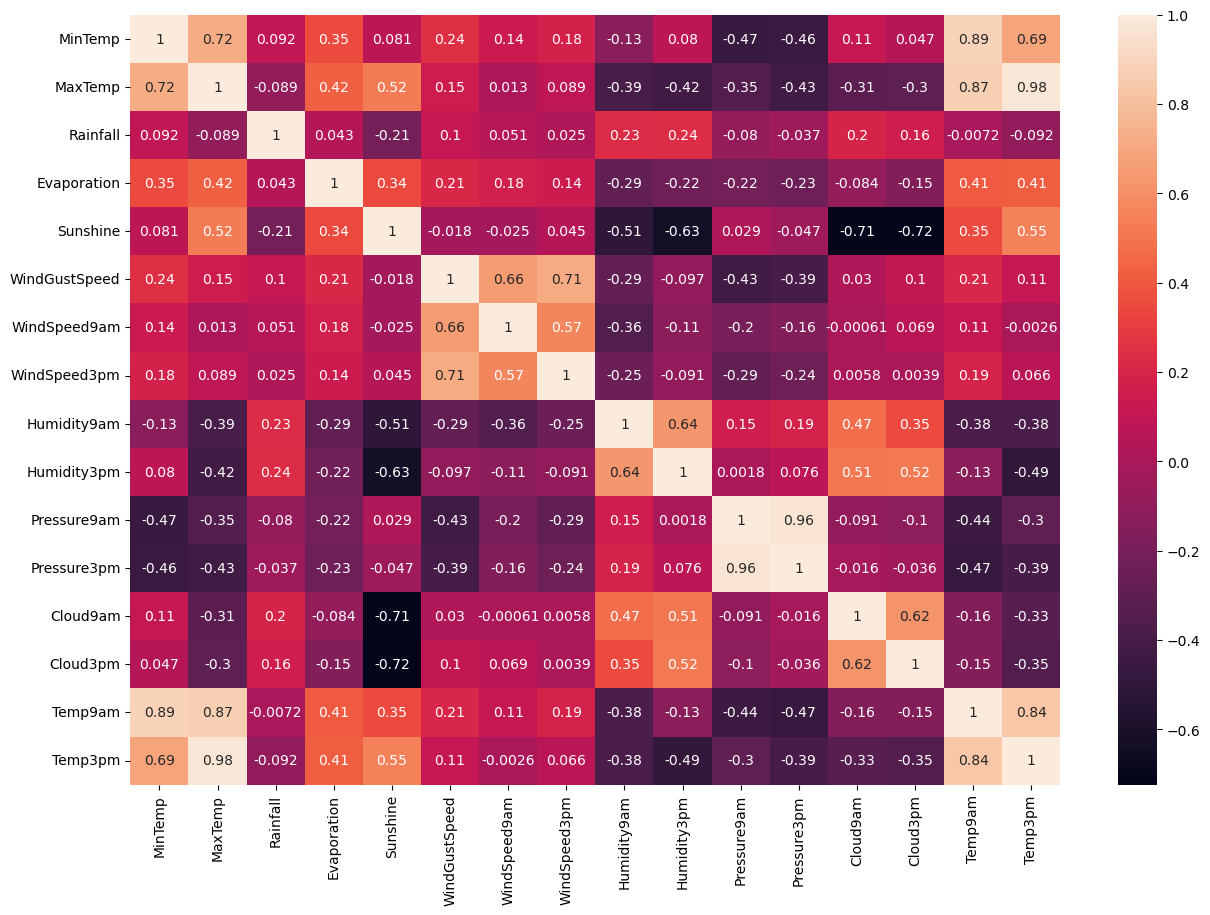

In [73]:
plt.figure(figsize= (15,10))
sns.heatmap(df.corr(),annot=True)

In [74]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


In [75]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [76]:
df1=df.drop(["Evaporation","Sunshine","Cloud9am","Location","Date"],axis=1)

In [77]:
df1

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,NaN,16.9,21.8,No,No
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,17.2,24.3,No,No
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,2.0,21.0,23.2,No,No
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,18.1,26.5,No,No
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,10.1,22.4,No,No
8421,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,10.9,24.5,No,No
8422,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,12.5,26.1,No,No
8423,7.8,27.0,0.0,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,2.0,15.1,26.0,No,No


In [78]:
df2=df1.dropna(axis=0)

In [79]:
df2.shape

(4846, 18)

In [80]:
df2.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [81]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4846 entries, 2 to 8423
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        4846 non-null   float64
 1   MaxTemp        4846 non-null   float64
 2   Rainfall       4846 non-null   float64
 3   WindGustDir    4846 non-null   object 
 4   WindGustSpeed  4846 non-null   float64
 5   WindDir9am     4846 non-null   object 
 6   WindDir3pm     4846 non-null   object 
 7   WindSpeed9am   4846 non-null   float64
 8   WindSpeed3pm   4846 non-null   float64
 9   Humidity9am    4846 non-null   float64
 10  Humidity3pm    4846 non-null   float64
 11  Pressure9am    4846 non-null   float64
 12  Pressure3pm    4846 non-null   float64
 13  Cloud3pm       4846 non-null   float64
 14  Temp9am        4846 non-null   float64
 15  Temp3pm        4846 non-null   float64
 16  RainToday      4846 non-null   object 
 17  RainTomorrow   4846 non-null   object 
dtypes: float

In [82]:
df2.shape

(4846, 18)

In [83]:
df2.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [84]:
le1=LabelEncoder()
df2["WindGustDir"]=le1.fit_transform(df2["WindGustDir"])
df2["WindDir9am"]=le1.fit_transform(df2["WindDir9am"])
df2["WindDir3pm"]=le1.fit_transform(df2["WindDir3pm"])
df2["RainToday"]=le1.fit_transform(df2["RainToday"])
df2["RainTomorrow"]=le1.fit_transform(df2["RainTomorrow"])

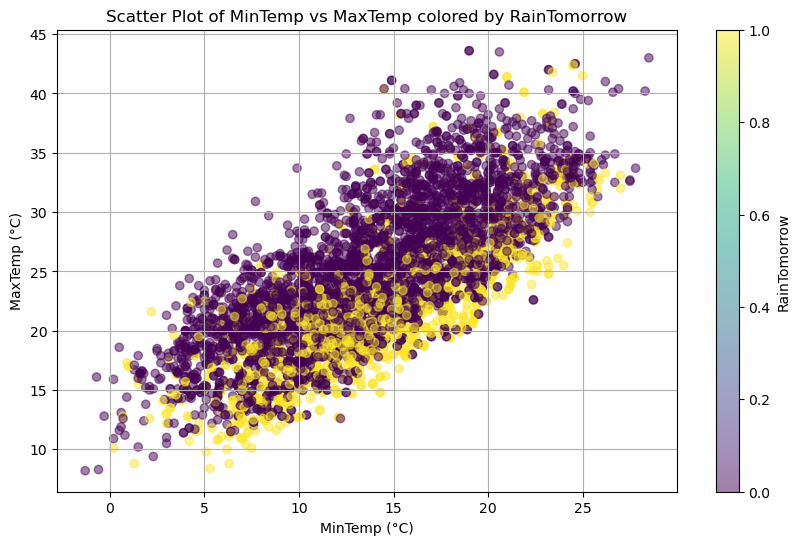

In [85]:
# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df2['MinTemp'], df2['MaxTemp'], c=df2['RainTomorrow'], cmap='viridis', alpha=0.5)
plt.colorbar(label='RainTomorrow')
plt.xlabel('MinTemp (°C)')
plt.ylabel('MaxTemp (°C)')
plt.title('Scatter Plot of MinTemp vs MaxTemp colored by RainTomorrow')
plt.grid(True)
plt.show()

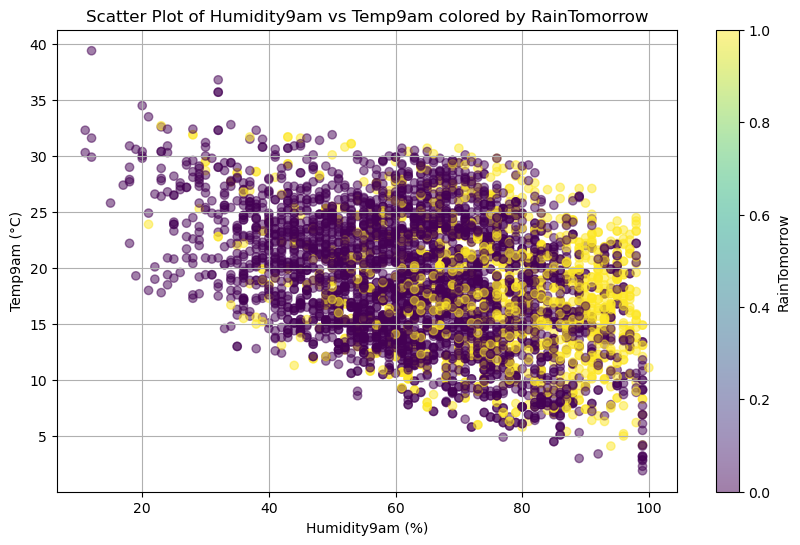

In [86]:
# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df2['Humidity9am'], df2['Temp9am'], c=df2['RainTomorrow'], cmap='viridis', alpha=0.5)
plt.colorbar(label='RainTomorrow')
plt.xlabel('Humidity9am (%)')
plt.ylabel('Temp9am (°C)')
plt.title('Scatter Plot of Humidity9am vs Temp9am colored by RainTomorrow')
plt.grid(True)
plt.show()

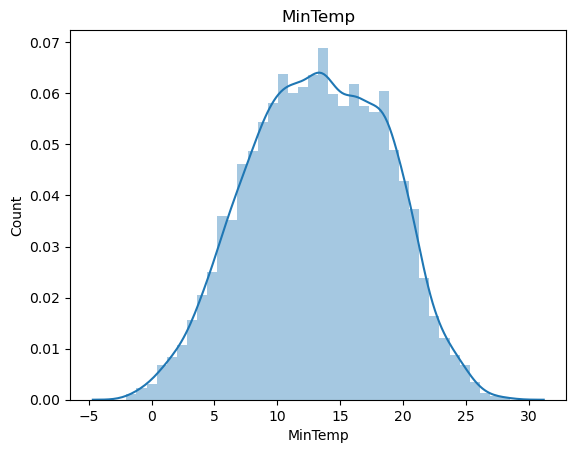

<Figure size 1500x1500 with 0 Axes>

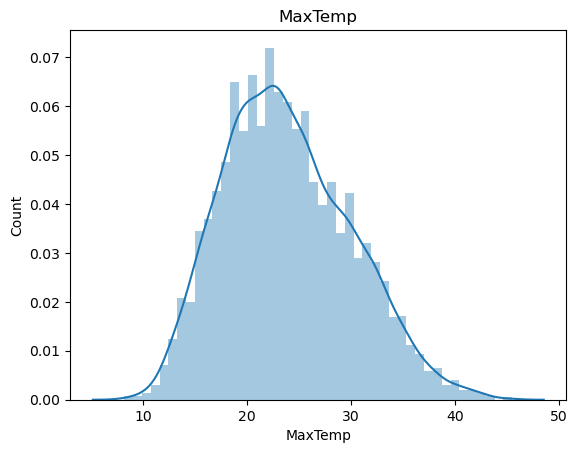

<Figure size 1500x1500 with 0 Axes>

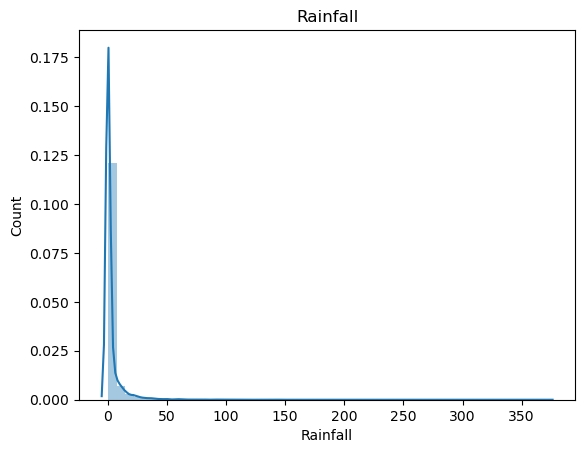

<Figure size 1500x1500 with 0 Axes>

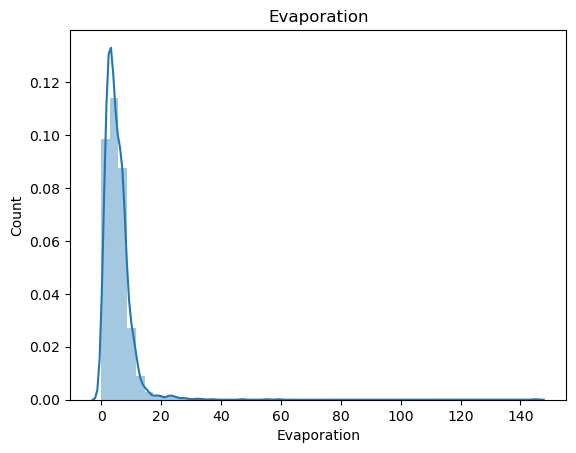

<Figure size 1500x1500 with 0 Axes>

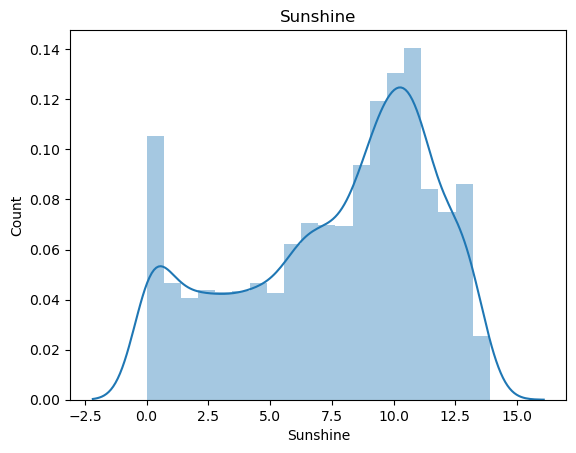

<Figure size 1500x1500 with 0 Axes>

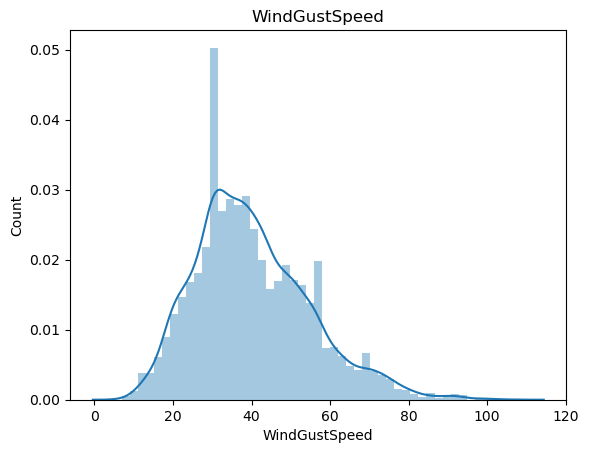

<Figure size 1500x1500 with 0 Axes>

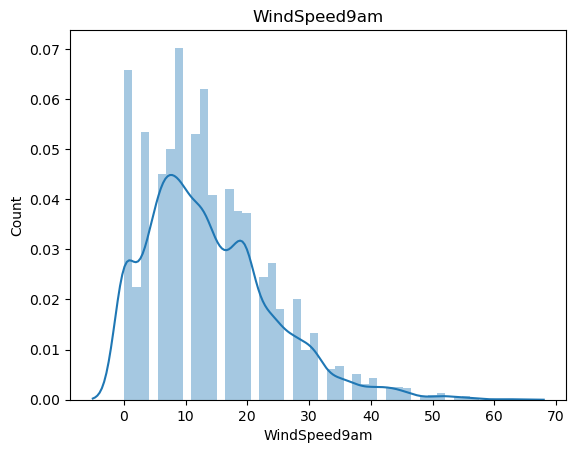

<Figure size 1500x1500 with 0 Axes>

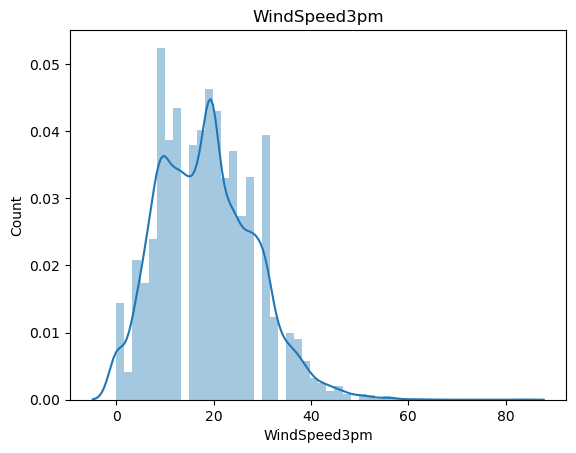

<Figure size 1500x1500 with 0 Axes>

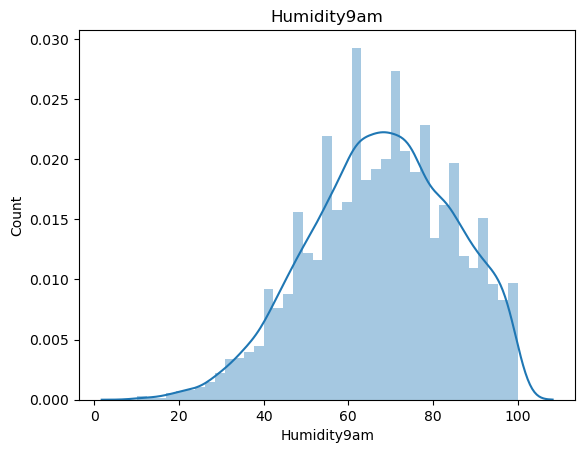

<Figure size 1500x1500 with 0 Axes>

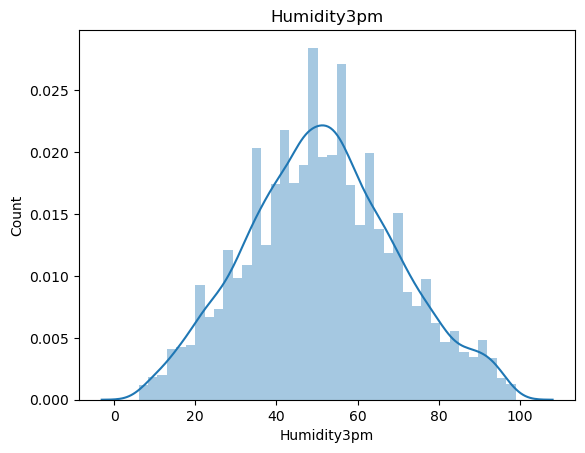

<Figure size 1500x1500 with 0 Axes>

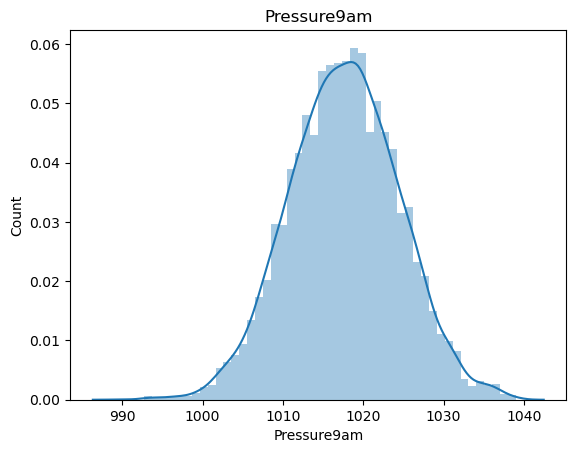

<Figure size 1500x1500 with 0 Axes>

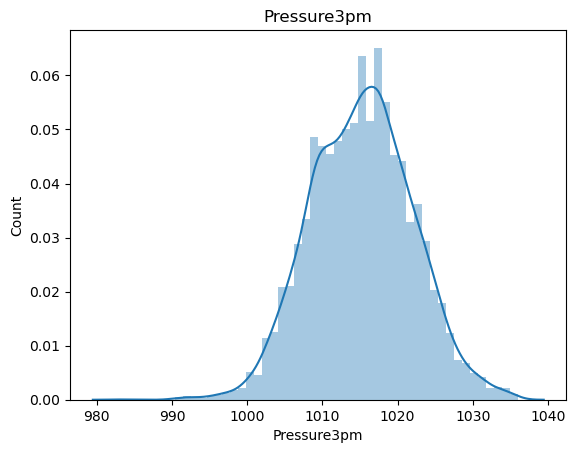

<Figure size 1500x1500 with 0 Axes>

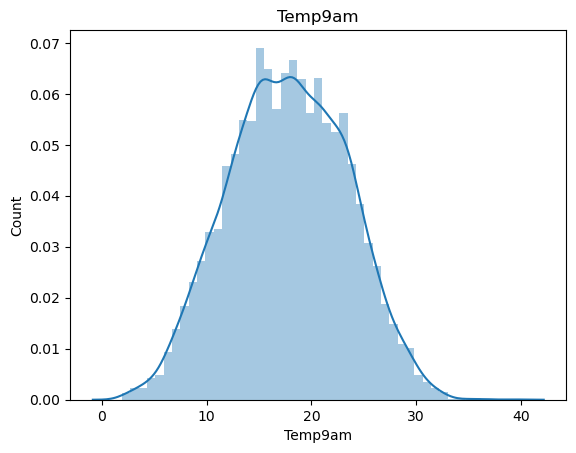

<Figure size 1500x1500 with 0 Axes>

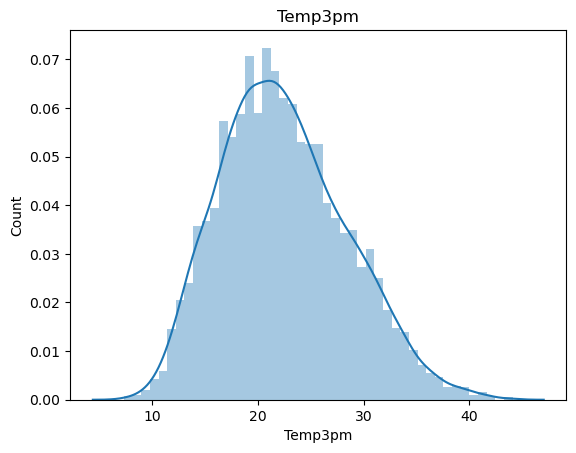

<Figure size 1500x1500 with 0 Axes>

In [87]:
for feature in continuous_feature:
    data=df2.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

In [35]:
x = df2.drop(['RainTomorrow'],axis=1)
y= df2["RainTomorrow"]

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2,random_state=42)

In [43]:
# LogisticRegression

In [37]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [38]:
predictions = lr.predict(x_test)

In [42]:
print(confusion_matrix(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))

[[638  61]
 [100 171]]
[[638  61]
 [100 171]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.89       699
           1       0.74      0.63      0.68       271

    accuracy                           0.83       970
   macro avg       0.80      0.77      0.78       970
weighted avg       0.83      0.83      0.83       970

0.8340206185567011


In [44]:
# Decision Tree

In [45]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [46]:
predictions = dt.predict(x_test)

In [50]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))

[[611  88]
 [ 79 192]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       699
           1       0.69      0.71      0.70       271

    accuracy                           0.83       970
   macro avg       0.79      0.79      0.79       970
weighted avg       0.83      0.83      0.83       970

0.8278350515463917


In [53]:
# Initializing the k-Nearest Neighbors classifier with k=5
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Training the classifier on the training data
knn_classifier.fit(x_train, y_train)

# Making predictions on the testing data
y_pred = knn_classifier.predict(x_test)

# Evaluating the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8237113402061855


In [54]:
# Initializing the Support Vector Classifier (SVC)
svc_classifier = SVC(kernel='linear', random_state=42)  # Linear kernel is used here, you can try other kernels as well

# Training the classifier on the training data
svc_classifier.fit(x_train, y_train)

# Making predictions on the testing data

y_pred = svc_classifier.predict(x_test)

# Evaluating the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.831958762886598


In [98]:
def predlr_function(t):
    t=t.reshape(1,-1)
    pred=lr.predict(t)
    if pred==0:
        print('It will not rain tomorrow') 
    else:
        print('It will rain tomorrow')

In [101]:
t=np.array([12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,2.0,21.0,23.2,0])
predlr_function(t)

It will not rain tomorrow


In [78]:
#b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


In [82]:

# Split features and target variable
X = df2.drop([ 'Rainfall'], axis=1)  # Features
y = df2['Rainfall']  # Target variable

In [83]:
# Split data into training and testing sets

x_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [86]:
# Choose a linear regression model
reg = LinearRegression()

In [87]:
# Train the model
reg.fit(x_train, y_train)


LinearRegression()

In [88]:
# Make predictions
y_pred = reg.predict(x_test)

In [94]:
# Evaluate the model

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [95]:
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Mean Absolute Error (MAE): 237.11930059116133
Mean Squared Error (MSE): 59724.64897499675
R-squared (R2) Score: -988.5455373976365


In [103]:
# Make predictions for a new set of features
# Here, you can provide the features of a particular day for which you want to predict the rainfall amount
new_features = X_test.iloc[0].values.reshape(1, -1)  # Example: Taking the features of the first row in the test set
predicted_rainfall = reg.predict(new_features)


In [104]:
print("Predicted Rainfall Amount (mm):", predicted_rainfall[0])


Predicted Rainfall Amount (mm): 13.437000454315168
